In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('Life_Test_Data.csv')
X = df[['GDP', 'Schooling', 'Income_composition_of_resources', 'Adult_Mortality', 'Total_expenditure']] 
y = df['Life_expectancy']
#df.info()
m = len(y)
X.fillna(X.mean()) # we use this function to fill empty cell in dataset by clculating there mean
X = X.fillna(X.mean()) # By applying above mentioned function we will get a new dataset then we will store it in new X variable
#X.isnull().sum() # To check if there is any cell is empty or not
#df.head()
X.head()

,GDP,Schooling,Income_composition_of_resources,Adult_Mortality,Total_expenditure
0,584.259210,10.1,0.479,263,8.16
1,612.696514,10.0,0.476,271,8.18
2,631.744976,9.9,0.470,268,8.13
3,669.959000,9.8,0.463,272,8.52
4,63.537231,9.5,0.454,275,7.87


In [23]:
def featureNormalize(X):
    '''
    This function takes the features as input and
    returns the normalized values, the mean, as well 
    as the standard deviation for each feature.
    '''
    X_norm = (X-np.mean(X))/np.std(X) ## Scaling function.
    mu = np.mean(X) ## Define the mean
    sigma = np.std(X) ## Define the standard deviation.
    return X_norm, mu, sigma ## return the values.

X, mean, std = featureNormalize(X)

In [10]:
X = np.append(np.ones([m,1]), X, axis=1) ## Append the bias term (field containing all ones) to X.
y = np.array(y).reshape(-1,1) ## reshape y to mx1 array
theta = np.zeros([6,1]) ## Initialize theta (the coefficient) to a 6x1 zero vector.
y

array([[65. ],
       [59.9],
       [59.9],
       [59.5],
       [59.2],
       [58.8],
       [58.6],
       [58.1],
       [57.5],
       [57.3],
       [57.3],
       [57. ],
       [56.7],
       [56.2],
       [55.3],
       [54.8],
       [77.8],
       [77.5],
       [77.2],
       [76.9],
       [76.6],
       [76.2],
       [76.1],
       [75.3],
       [75.9],
       [74.2],
       [73.5],
       [73. ],
       [72.8],
       [73.3],
       [73.6],
       [72.6],
       [75.6],
       [75.4],
       [75.3],
       [75.1],
       [74.9],
       [74.7],
       [74.4],
       [74.1],
       [73.8],
       [73.4],
       [72.9],
       [72.3],
       [71.7],
       [71.6],
       [71.4],
       [71.3],
       [52.4],
       [51.7],
       [51.1],
       [56. ],
       [51. ],
       [49.6],
       [49.1],
       [48.7],
       [48.2],
       [47.7],
       [47.4],
       [47.1],
       [46.8],
       [46.5],
       [45.7],
       [45.3],
       [76.4],
       [76.2],
       [76

In [25]:
# Applying Cost Function
def computeCostMulti(X,y, theta):
    '''
    This function takes in the the values for 
    the training set as well as initial values 
    of theta and returns the cost(J).
    '''
    m = len(y) ## length of the training data
    h = X.dot(theta) ## The hypothesis
    J = 1/(2*m)*(np.sum((h-y)**2)) ## Implementing the cost function
    return J

cost = computeCostMulti(X,y,theta) ## Call the function
print(cost)

2630.0829648241206


In [26]:
# Applying Gradient Descent Algorithm
def gradientDescentMulti(X, y, theta, alpha, iter):
    '''
    This function takes in the values of the training set, 
    as well the intial theta values(coefficients), the 
    learning rate, and the number of iterations. The output 
    will be the a new set of coefficeients(theta), optimized 
    for making predictions, as well as the array of the cost 
    as it depreciates on each iteration.
    '''
    J_history = [] ## Array for storing the cost values on each iteration.
    m = len(y) ## Length of the training set
    for i in range(iter): ## Loop for 400 iterations
        h = X.dot(theta) ## The hypothesis
        theta = theta - ((alpha/m)*(X.T.dot(h-y))) ## Grad.desc.func.
        J_history.append(computeCostMulti(X, y, theta)) ## Append the cost to the J_history array
    return theta, J_history ## Return the final values of theta and the J_history array

iter = 500 ## Initialize the iteration parameter.
alpha = 0.03 ## Initialize the learning rate.

In [27]:
new_theta, J_history = gradientDescentMulti(X, y, theta, alpha, iter)
print (new_theta)

[[ 7.19688267e+01]
 [ 1.49610284e+00]
 [ 2.03186107e+00]
 [ 4.89013296e-01]
 [-5.24700400e+00]
 [ 6.08698503e-02]]


In [28]:
new_cost = computeCostMulti(X,y,new_theta) ## We call the function again, but use the new coefficients.
print(new_cost)

11.386109020207401


Text(0.5, 1.0, 'Minimizing Cost Using Gradient Descent')

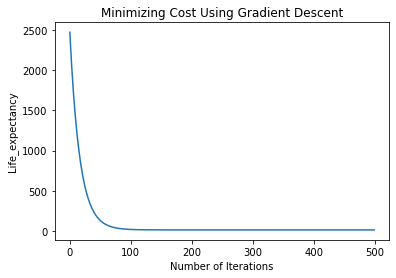

In [29]:
# Optional part
plt.plot(J_history)
plt.ylabel('Life_expectancy')
plt.xlabel('Number of Iterations')
plt.title('Minimizing Cost Using Gradient Descent')

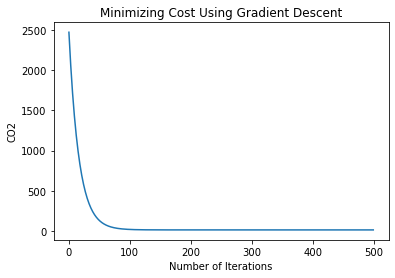

In [30]:
plt.plot(J_history)
plt.ylabel('CO2')
plt.xlabel('Number of Iterations')
plt.title('Minimizing Cost Using Gradient Descent')
theta_1, J_history_1 = gradientDescentMulti(X, y, theta, 0.3, 50)
theta_2, J_history_2 = gradientDescentMulti(X, y, theta, 0.1, 50)
theta_3, J_history_3 = gradientDescentMulti(X, y, theta, 0.03, 50)
theta_4, J_history_4 = gradientDescentMulti(X, y, theta, 0.01, 50)
theta_5, J_history_5 = gradientDescentMulti(X, y, theta, 0.003, 50)
theta_6, J_history_6 = gradientDescentMulti(X, y, theta, 0.001, 50)

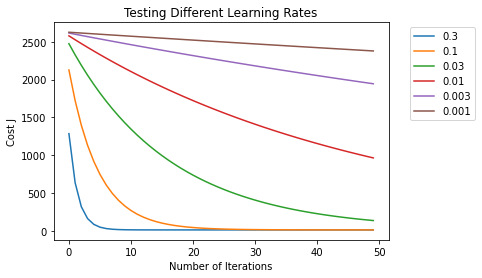

In [31]:
plt.plot(J_history_1, label='0.3')
plt.plot(J_history_2, label='0.1')
plt.plot(J_history_3, label='0.03')
plt.plot(J_history_4, label='0.01')
plt.plot(J_history_5, label='0.003')
plt.plot(J_history_6, label='0.001')
plt.title('Testing Different Learning Rates')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.legend(bbox_to_anchor=(1.05, 1.0))

In [32]:
# Perdict Function
X = np.array([1000, 12, 0.456, 100, 12.450])
X = (X-mean)/std
X = np.append(1, X)
X = np.reshape(X, (1,6))
print(X)

[[ 1.         -0.58063794 -0.12948515 -1.17240218 -0.31150446  3.14838903]]


In [15]:
# Testing our algorithm by making some perdiction
def prediction(X, theta):
    '''
    This function takes in the features of the cars 
    as well as the coefficients, and returns the 
    predicted co2 emission.
    '''
    return np.dot(X, theta)

pred = prediction(X, new_theta)
print(pred)

[[72.08982366]]
